# サポートベクターマシン (SVM)
---
- 分類や回帰に利用することができる、ひとつのパターン認識モデルである。
    - 未知のデータに対する汎化能力が高い。
    - サンプルよりも特徴が多い場合に特に有効である。
    - 基本的には線形分類を行うが、カーネル法やカーネルトリックを用いて非線形分類を行うことが可能である。

In [2]:
import numpy as np
import pandas as pd
from sklearn.svm import LinearSVC, SVC
%matplotlib inline

## Cheat Sheet での位置づけ
---
- 分類タスク (classification) のとき、
    - データ量が多くはない (100K samples 未満) 場合に、線形SVM分類器 (Linear SVC) を使う。
    - 他の手法を試してみてもうまくいかない場合に、最終的にカーネルSVM分類器 (SVC) を使う。
![scikit-learn algorithm cheat-sheet](http://scikit-learn.org/stable/_static/ml_map.png)

## SVMの例
---
- アヤメのデータから、品種をSVMで予測する。

In [3]:
# 予測ラベル（品種）の確認
iris_ = pd.read_csv("./data/iris.csv")
pd.Categorical(iris_['label'])

['setosa', 'setosa', 'setosa', 'setosa', 'setosa', ..., 'virginica', 'virginica', 'virginica', 'virginica', 'virginica']
Length: 150
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [4]:
# データの読み込みと確認
iris = pd.read_csv('./data/iris.csv')
iris['label'] = pd.Categorical(iris['label'])
iris.loc[iris['label'].cat.codes < 2].iloc[np.arange(0, 100, 20), [0, 1, 4]]

,sepal length (cm),sepal width (cm),label
0,5.1,3.5,setosa
20,5.4,3.4,setosa
40,5.0,3.5,setosa
60,5.0,2.0,versicolor
80,5.5,2.4,versicolor


In [5]:
x_clear = iris.loc[iris['label'].cat.codes < 2].values
x_ambiguous = iris.loc[iris['label'].cat.codes > 0].values
y = iris.iloc[:100, -1].cat.codes

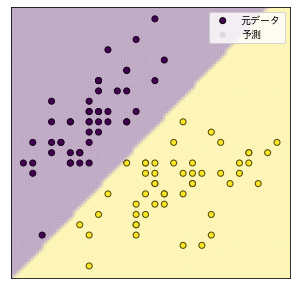

In [6]:
from helpers.svm import visualization
visualization.show(x_clear[:, (0, 1)], y)

## 仕組み

### マージン最大化
---
データを2つのクラスに線形に分ける際に、決定境界から最も近いデータまでの距離 (マージン) を最大化するように境界線 (面) を設定することで、未知のデータが入ってきたときの汎化性能の高いモデルを構築する。

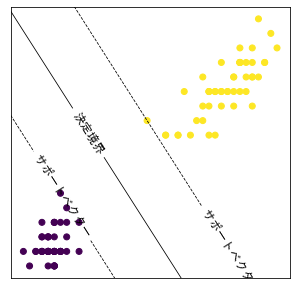

In [7]:
from helpers.svm import hard_margin
hard_margin.show(x_clear[:, (2, 3)], y)

### ソフトマージン
---
実際のデータは綺麗に線形に分けられることは少ないので、パラメーター $C$ によって誤分類の許容度を調整する。

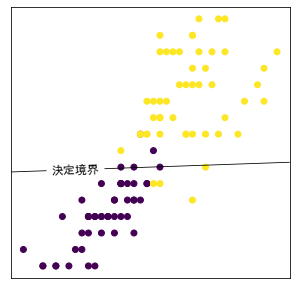

In [8]:
from helpers.svm import soft_margin
soft_margin.show(x_ambiguous[:, (2, 3)], y)

### カーネル
---
詳しい中身は高度すぎるので省略するが、データを高次元空間 (再生核ヒルベルト空間) に写像して、その空間で線形分離する超平面を探すカーネル法とその解を求めるためのカーネルトリックを用いて、非線形な決定境界を得る。

In [9]:
%matplotlib notebook
%matplotlib notebook
from helpers.svm import kernel
kernel.show(x_ambiguous[:, (0, 1)], y)


<IPython.core.display.Javascript object>

interactive(children=(FloatLogSlider(value=0.1, continuous_update=False, description='$C$', max=2.0, min=-1.0,…

## Pythonでの実行方法
---
- sklearn.svm.LinearSVC (線形カーネルのみ) または sklearn.svm.SVC を用いる。
    - [詳細（公式ガイド） - sklearn.svm.LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html)
    - [詳細（公式ガイド） - sklearn.svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

In [10]:
# 以下のコマンドで、コマンドライン上でも関数の詳細を確認できる。
# help(LinearSVC)
# help(SVC)

In [11]:
def plot(kernel, C, gamma, x, y):
    model = SVC(kernel=linear, C=0.03, gamma=0.001, random_state=1)
    model.fit(x, y)
    plt.figure(figsize=(5, 5))
    ax = plt.axes()
    ax.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', label='元データ')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], resolution)
    yy = np.linspace(ylim[0], ylim[1], resolution)
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], resolution),
                         np.linspace(ylim[0], ylim[1], resolution))
    grid = np.c_[xx.ravel(), yy.ravel()]
    ax.scatter(xx, yy, c=model.predict(grid).reshape(
        xx.shape), alpha=0.1, edgecolors='none', label='予測')
    ax.legend(loc='upper right')
    plt.setp(ax, xticks=(), yticks=(), xlim=xlim, ylim=ylim)
    plt.show()

In [12]:
plot("linear", 0.03, 0.001, x_clear[:, (0, 1)], y)

NameError: name 'linear' is not defined